# Модуль 17. Практическая работа

## Цель работы

Реализовать обучение простой нейронной сети, используя цепное правило (для вычисления производной сложной функции).

Выполненное задание не нужно сдавать на проверку, оно факультативно. Решите его, чтобы потренироваться.

## Что нужно сделать

В видео говорилось, что метод обратного распространения ошибки – главный алгоритм обучения нейронных сетей. Мы выяснили, что метод основывается на правиле дифференцирования сложной функции, так называемом цепном правиле. Более того, вычислили градиент функции потерь и увидели, как он (взятый со знаком минус) указывает направление, в котором функция убывает быстрее всего. Нейронная сеть, с которой мы экспериментировали, имела два входа, один внутренний нейрон и один выход. Мы использовали скалярные значения: в наших данных был всего один объект из двух атрибутов. 

В этом задании давайте попробуем обучить ту же нейронную сеть с двумя входами и одним нейроном (функция активации – гиперболический тангенс), но данных будет больше. Например, 100 объектов, по два атрибута в каждом. Для всех объектов известно значение целевой переменной. Решим задачу регрессии. Для представления объектов данных и весов сети будем использовать numpy-массивы, так как для них реализованы все необходимые математические операции (включая гиперболический тангенс). 

## Алгоритм выполнения задания

1. В `ЯЧЕЙКЕ 1` заданы входные данные сети, инициализированы её веса и определены необходимые функции: сама сеть и её функция потерь. Запустите ячейку.
1. В `ЯЧЕЙКЕ 2` объявлены функции `grad_w1` и `grad_w2`, вам **нужно наполнить их кодом.** Функции `grad_w1` и `grad_w2` должны вычислять производную функцию потерь по `w1` и `w2` соотвественно. Как это сделать, вы знаете: мы разбирали всё в первом видео об обратном распространении ошибки. Вы умеете вычислять производную функции потерь (среднеквадратичная ошибка) для нейронной сети при скалярных значениях, с векторами всё будет так же, только вместо скаляров numpy-массивы. Попробуйте. 
1. В `ЯЧЕЙКЕ 3` реализован тренировочный цикл: итерация за итерацией выполняется прямой проход по сети, вычисляется функция потерь и её градиент, обновляются веса. Значение функции потерь сохраняется в список. Когда цикл завершается, список со значениями функции потерь выводится в виде графика. Если вы правильно реализовали `grad_w1` и `grad_w2`, то увидите график убывающей функции: потери становятся всё меньше и меньше, сеть учится. 

Если что-то не получается (или всё получилось, но просто интересно), можете свериться с решением, оно в конце ноутбука. То, что мы сейчас сделали, – это настоящее обучение нейронной сети, выполненное без всяких фреймворков, что называется, с нуля. В следующих видео вы познакомитесь с `pytorch` и узнаете, как это реализовано в нём. 

In [1]:
### ЯЧЕЙКА 1

import numpy as np
import matplotlib.pyplot as plt

# Число семплов в датасете
n_samples = 100

#
# Генерируем данные. Векторы X1 и X2 случайны
#
X1 = np.random.rand(n_samples)
X2 = np.random.rand(n_samples)

#
# Целевая переменная y – нелинейная функция от X1 и X2
#
y = np.sin(np.sqrt(X1**2 + X2**2))

#
# Инициализируем веса модели случайными значениями
# Входа у нас всего два, поэтому веса тоже два
#
w1 = np.random.rand()
w2 = np.random.rand()

#
# Это прямой проход сети: гиперболический тангенс от линейной комбинации
# входных данных и весов сети (сдвиг для простоты считаем нулевым)
#
def forward_pass(x1, x2, w1, w2):
    return np.tanh(x1*w1 + x2*w2)

#
# Определяем функцию потерь – это среднеквадратичная ошибка (MSE)
#
def loss_fn(y, pred):
    # На этот раз усредняем по всей выборке данных
    return np.square(y - pred).mean()

In [7]:
### ЯЧЕЙКА 2

# Вычисляет и возвращает частную производную функции потерь по w1
def grad_w1(x1, x2, w1, w2, y):
    v = x1*w1 + x2*w2
    q = np.tanh(v)
    u = y - q
    e = np.square(u)

    de_du = 2*u
    du_dq = -1
    dq_dv = 1 - np.square(q)
    dv_dw1 = x1 

    return de_du*du_dq*dq_dv*dv_dw1
 
# Вычисляет и возвращает частную производную функции потерь по w1
def grad_w2(x1, x2, w1, w2, y):
    v = x1*w1 + x2*w2
    q = np.tanh(v)
    u = y - q
    e = np.square(u)

    de_du = 2*u
    du_dq = -1
    dq_dv = 1 - np.square(q)
    dv_dw1 = x2 

    return de_du*du_dq*dq_dv*dv_dw1

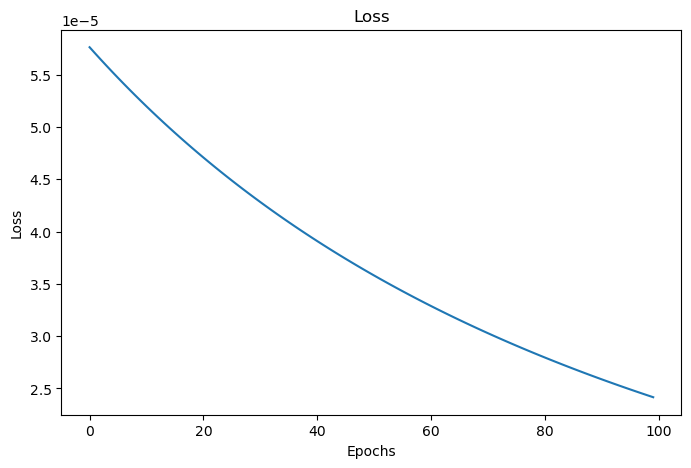

In [8]:
### ЯЧЕЙКА 3

# Сделаем 100 циклов градиентного спуска
num_epochs = 100

# На каждом будем немного менять веса в направлении, 
# противоположном градиенту
step = 0.1

# В конце каждого цикла сохраним текущее значение функции потерь
loss_values = []

#
# Обучающий цикл
#
for i in range(num_epochs):
    #
    # Прямой проход: вычисляем предсказания сети
    #
    pred = forward_pass(X1, X2, w1, w2)

    #
    # Вычисляем значение функции потерь
    #
    loss = loss_fn(pred, y)

    #
    # Сохраняем значение функции потерь в список
    #
    loss_values.append(loss)

    #
    # Обновляем веса в направлении антиградиента
    #      
    w1 -= step*grad_w1(X1, X2, w1, w2, y) 
    w2 -= step*grad_w2(X1, X2, w1, w2, y)

#
# Рисуем график потерь
#
dx = np.arange(0, num_epochs, 1)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(dx, np.array(loss_values))
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Решение

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Число семплов в датасете
n_samples = 100

#
# Генерируем данные. Векторы X1 и X2 случайны
#
X1 = np.random.rand(n_samples)
X2 = np.random.rand(n_samples)

#
# Целевая переменная y – нелинейная функция от X1 и X2
#
y = np.sin(np.sqrt(X1**2 + X2**2))

#
# Инициализируем веса модели случайными значениями
# Входа у нас всего два, поэтому веса тоже два
#
w1 = np.random.rand()
w2 = np.random.rand()

#
# Это прямой проход сети: гиперболический тангенс от линейной комбинации
# входных данных и весов сети (сдвиг для простоты считаем нулевым)
#
def forward_pass(x1, x2, w1, w2):
    return np.tanh(x1*w1 + x2*w2)

#
# Определяем функцию потерь – это среднеквадратичная ошибка (MSE)
#
def loss_fn(y, pred):
  # На этот раз усредняем по всей выборке данных
  return np.square(y - pred).mean()

In [4]:
def grad_w1(x1, x2, w1, w2, gt):
    v = x1*w1 + x2*w2
    q = np.tanh(v)
    u = gt - q
    e = np.square(u)

    de_du = 2*u
    du_dq = -1
    dq_dv = 1 - np.square(q)
    dv_dw1 = x1 

    return de_du*du_dq*dq_dv*dv_dw1

def grad_w2(x1, x2, w1, w2, gt):
    v = x1*w1 + x2*w2
    q = np.tanh(v)
    u = gt - q
    e = np.square(u)

    de_du = 2*u
    du_dq = -1
    dq_dv = 1 - np.square(q)
    dv_dw1 = x2 

    return de_du*du_dq*dq_dv*dv_dw1

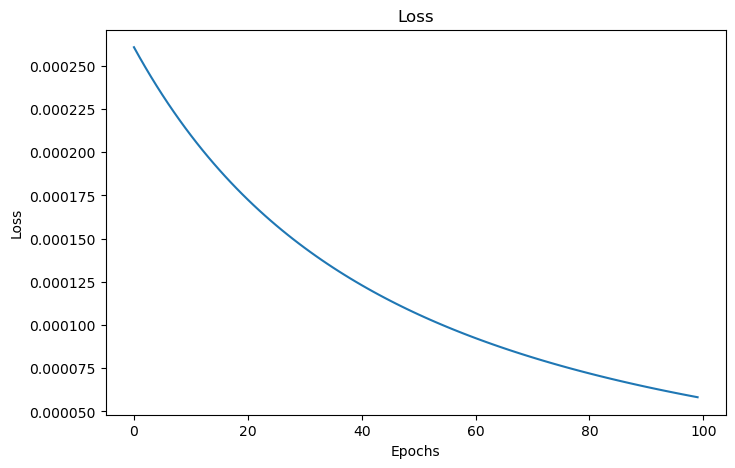

In [6]:
# Сделаем 100 циклов градиентного спуска
num_epochs = 100

# На каждом будем немного менять веса в направлении, 
# противоположном градиенту
step = 0.1

# В конце каждого цикла сохраним текущее значение функции потерь
loss_values = []

#
# Обучающий цикл
#
for i in range(num_epochs):
    #
    # Прямой проход: вычисляем предсказания сети
    #
    pred = forward_pass(X1, X2, w1, w2)

    #
    # Вычисляем значение функции потерь
    #
    loss = loss_fn(pred, y)

    #
    # Сохраняем значение функции потерь в список
    #
    loss_values.append(loss)

    #
    # Обновляем веса в направлении антиградиента
    #      
    w1 -= step*grad_w1(X1, X2, w1, w2, y) 
    w2 -= step*grad_w2(X1, X2, w1, w2, y)


#
# Рисуем график потерь
#
dx = np.arange(0, num_epochs, 1)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(dx, np.array(loss_values))
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()